In [ ]:
#Data downloaded from https://www.kaggle.com/c/decoding-the-human-brain/data

In [18]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [3]:
X=loadmat('C:/Users/koester_lab/Documents/Maria/EEG/data/train_subject01.mat')['X']
y=loadmat('C:/Users/koester_lab/Documents/Maria/EEG/data/train_subject01.mat')['y']

In [4]:
X_fft=np.fft.fft(X)

In [10]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X_fft,y,test_size=0.33, random_state=42)

train_y=train_y.flatten()
test_y=test_y.flatten()
scramble_X_train=train_X[train_y==0]
face_X_train=train_X[train_y==1]

In [13]:
from sklearn.decomposition import PCA


pca_scramble=PCA(n_components=10)
pcs_scramble=pca_scramble.fit_transform(np.mean(scramble_X_train[:,:,:],axis=0).T.real)
print(pca_scramble.explained_variance_ratio_)

[0.3732727  0.2887136  0.13668133 0.04963296 0.03410217 0.01528399
 0.01239001 0.0089811  0.00746813 0.00514333]


In [15]:

pca_face=PCA(n_components=10)
pcs_face=pca_face.fit_transform(np.mean(face_X_train[:,:,:],axis=0).T.real)
print(pca_face.explained_variance_ratio_)

[0.4787375  0.16946202 0.08059023 0.06387658 0.03358377 0.01868051
 0.01592627 0.01473332 0.00979745 0.00841412]


In [16]:
print(pcs_face.shape)

(375, 10)


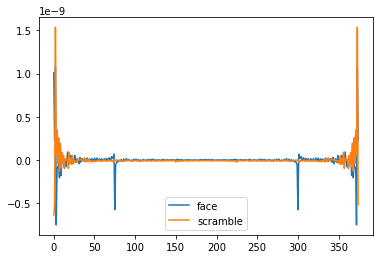

In [21]:
plt.plot(pcs_face[:,0],label='face')
plt.plot(pcs_scramble[:,0],label='scramble')
plt.legend()

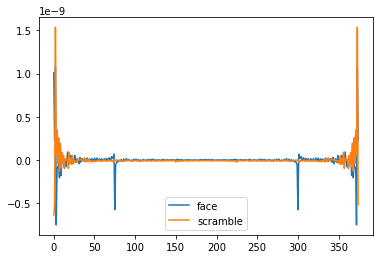

0.4132931092682636


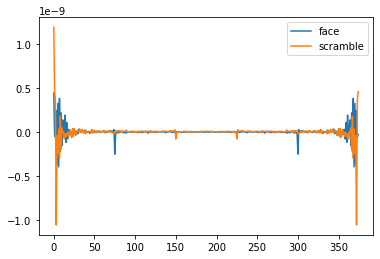

-0.1915907474780584


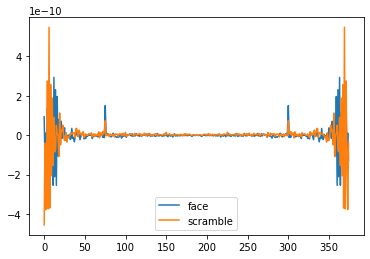

0.14117552987052903


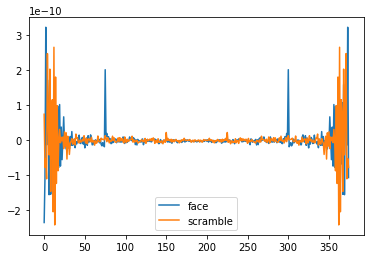

0.14996938652783198


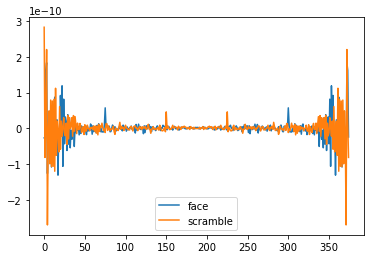

0.3670371942661092


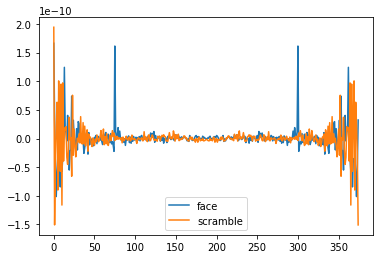

0.06999838495401528


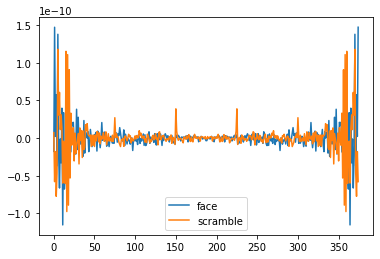

0.24349927196636417


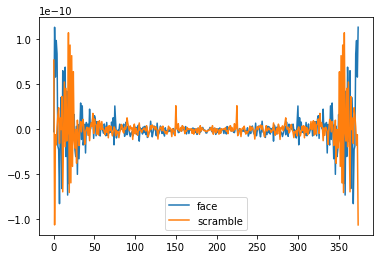

-0.2884322781261675


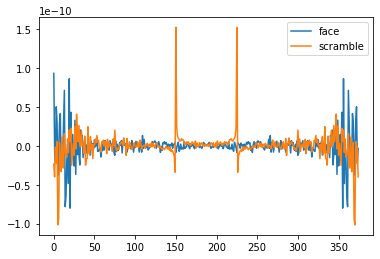

0.13904992976161434


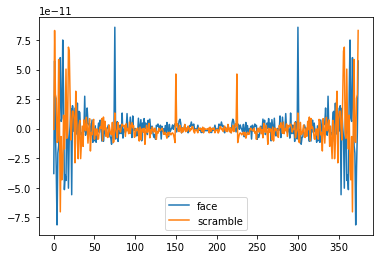

-0.15443109884108083


In [23]:
for j in range(0,10):
    plt.plot(pcs_face[:,j],label='face')
    plt.plot(pcs_scramble[:,j],label='scramble')
    plt.legend()
    plt.show()
    print(np.corrcoef(pcs_face[:,j],pcs_scramble[:,j])[0,1])